<a href="https://colab.research.google.com/github/AkaluTeklu/Price-of-Califorinia-housing/blob/main/Housing_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The California housing dataset contains eight features, namely median income, median house age, average number of rooms per household, average number of bedrooms per household, block group population,average number of household members, latitude and Latitude. And the median of the house value for each district is the target variable.

The task is predicting housing price in the Califorinia district using machine learning algorithm.

## Loading required packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow import keras

## Loading California Housing data

In [2]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X = dataset.data
Y = dataset.target

Let's see keywords in the dataset.

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
dataset.target_names    # Getting the name of the target variable

['MedHouseVal']


In [ ]:
dataset.feature_names  # Listing the name of the feature variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Data Preparation


After getting the data, it should be well prepared and organized.

### Data Cleansing

Cleaning the data to remove unwanted data, missing values, rows, and
columns, duplicate values, data type conversion, etc. let's check if there is any missing value.

In [3]:
dataset = pd.DataFrame(data=np.c_[dataset.data, dataset.target],                  # converting to DataFrame
                  columns=dataset.feature_names + ['Target'])

In [4]:
missing_values=dataset.isna()
total_missing=missing_values.sum()
print(f"total missinng value:{total_missing}")

total missinng value:MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


### Descriptive Statistics

The descriptive statistic of the data as shown provide a snapshot of the central tendency, dispersion, and distribution of data, which helps to gain initial insights about the characteristics of a dataset.

As we can see the most of dataset exhibits high dispersion, indicating a potential for data imbalance. This dispersion may lead to biased training if not addressed.

In [5]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
dataset.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
dataset.shape

(20640, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


The info() method is useful to get a quick description of the data, in particular
the total number of rows, each attribute’s type, and the number of non-null
values as shown above.

## Visualizing Data

This helps us gain an understanding of the different variables, how their values are distributed, and the correlations that exist between them as depicted below.

#### Histogram diagram

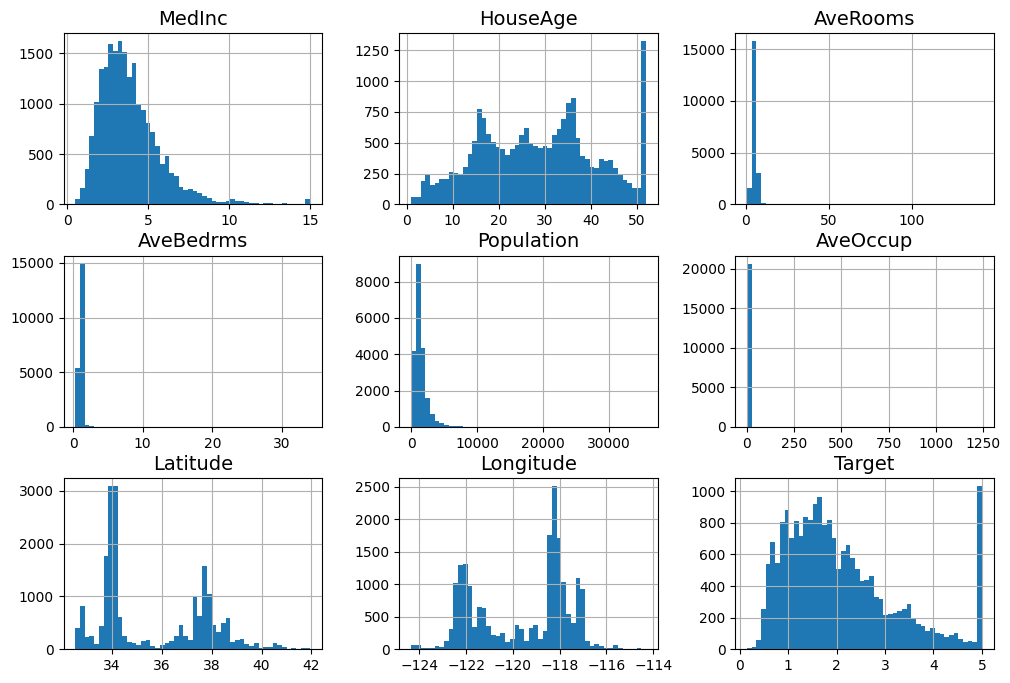

In [5]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
dataset.hist(bins=50, figsize=(12, 8))
plt.show()

As we can see, many histograms are skewed right: they extend much farther to
the right of the median than to the left. This may make it a bit harder for
some machine learning algorithms to detect patterns as well as capture the correct relations in data to make accurate predictions.

Hence, transformation of thes attributes to have more symmetrical and bell-shaped distributions is required.

#### Box Plot

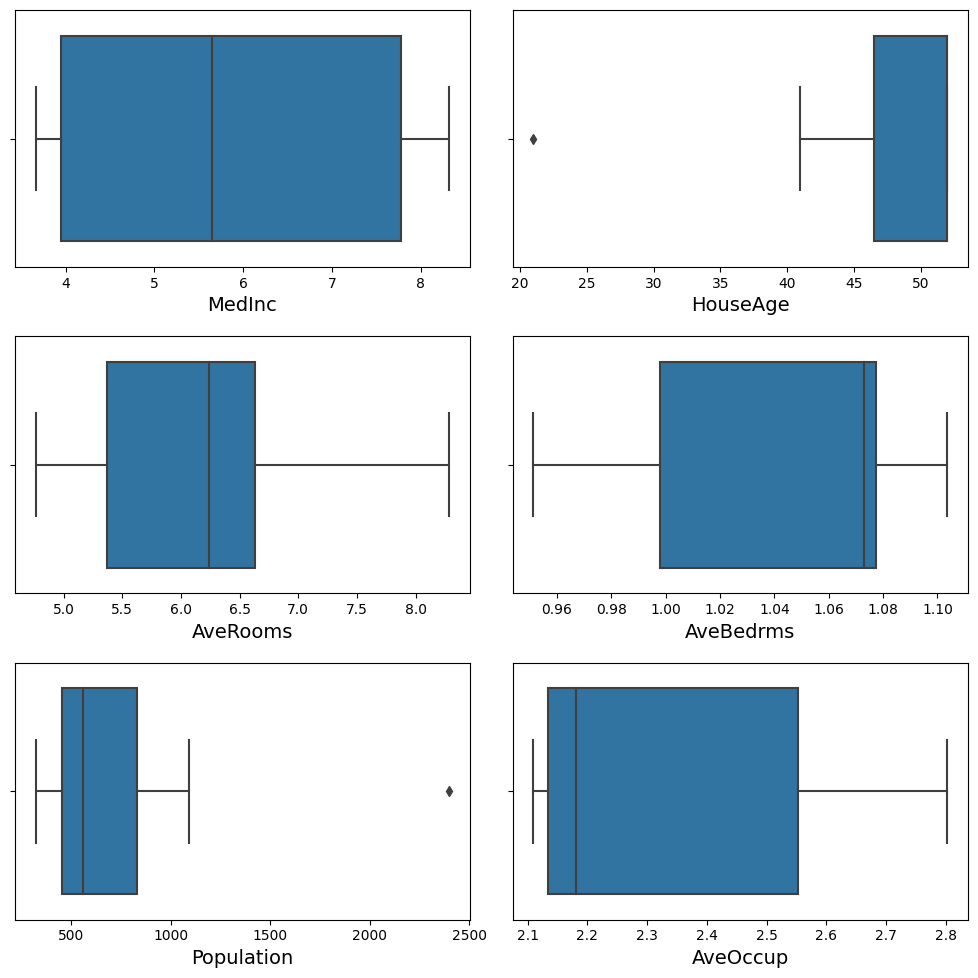

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
subset_data = dataset.iloc[:7, :]
for i, ax in enumerate(axes.flatten()):
    if i < subset_data.shape[1]:
        feature_name = subset_data.columns[i]
        sns.boxplot(data=subset_data, x=feature_name, ax=ax)


for i in range(subset_data.shape[1], len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


From the box plot, it is clearly shown how the most of the feature variables are skewed both to the left and right. Moreover, they also contain huge outliers.

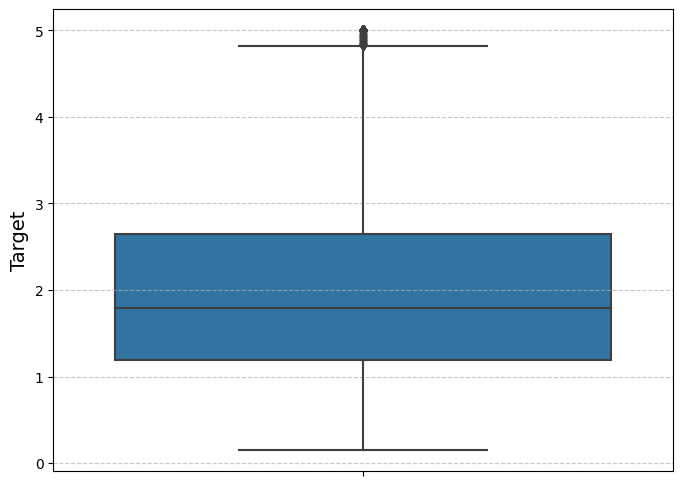

In [ ]:
# Create a box plot for the target variable (Median House Value)

plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, y='Target')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Given the inclusion of geographical information such as latitude and longitude in the dataset, creating a scatterplot of all the districts is a valuable idea to visually explore the spatial distribution of the data.

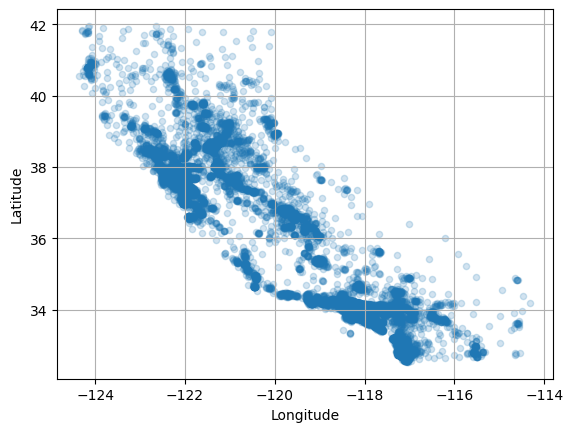

In [6]:
dataset.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.show()

The diagram below visualizes the relationship between housing prices and location (longitude, latitude). It suggests that housing prices are influenced by factors such as proximity to the ocean and population density.

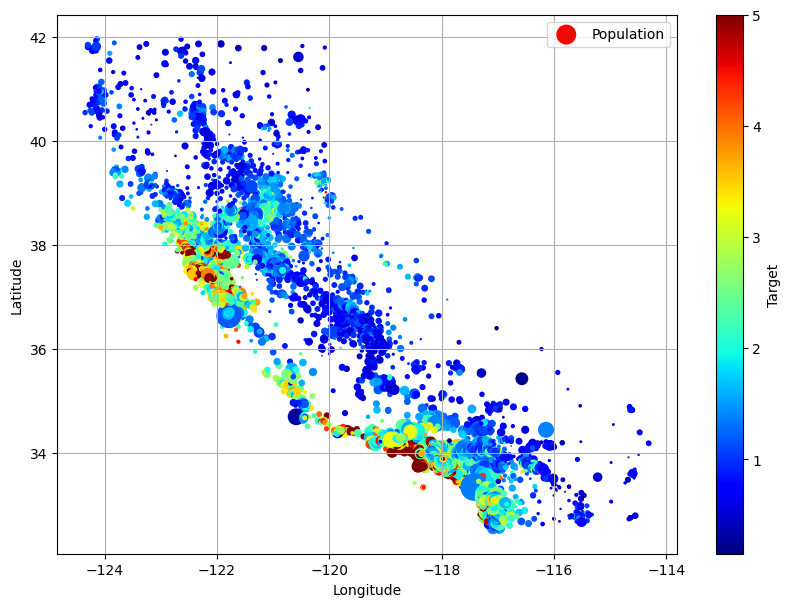

In [9]:
dataset.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
s=dataset["Population"] / 100, label="Population",
c="Target", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

# Correlation

The correlation coefficient ranges from –1 to 1. When it is close to 1, it
means that there is a strong positive correlation; for example, the median
house value tends to go up when the median income goes up as shown below. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to 0 mean that there is no linear correlation.

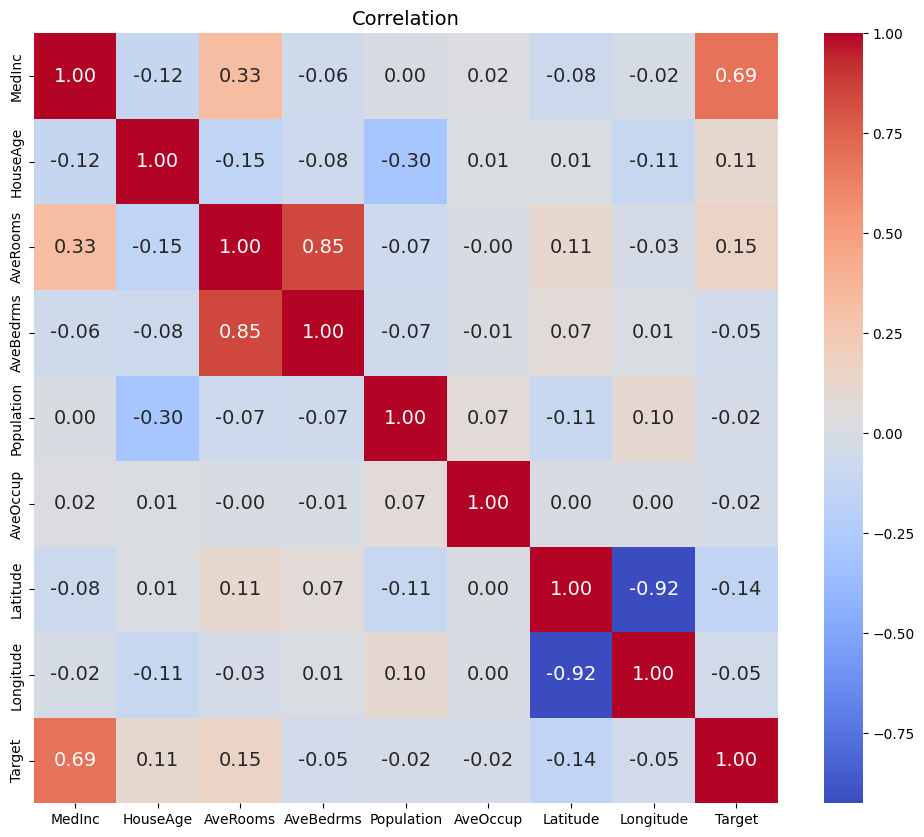

In [ ]:
# Correlation matrix between all input features and the target
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation')
plt.show()


In [ ]:
corr_order=dataset.corr()
corr_order['Target'].sort_values(ascending=False)

Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64

### Feature Selection

Looking at the correlation matrix above, it seems like the most promising attribute to predict the median house value is the median income. Let's zoom in their scatterplot to clearly see their correlation.

Text(0, 0.5, 'Target')

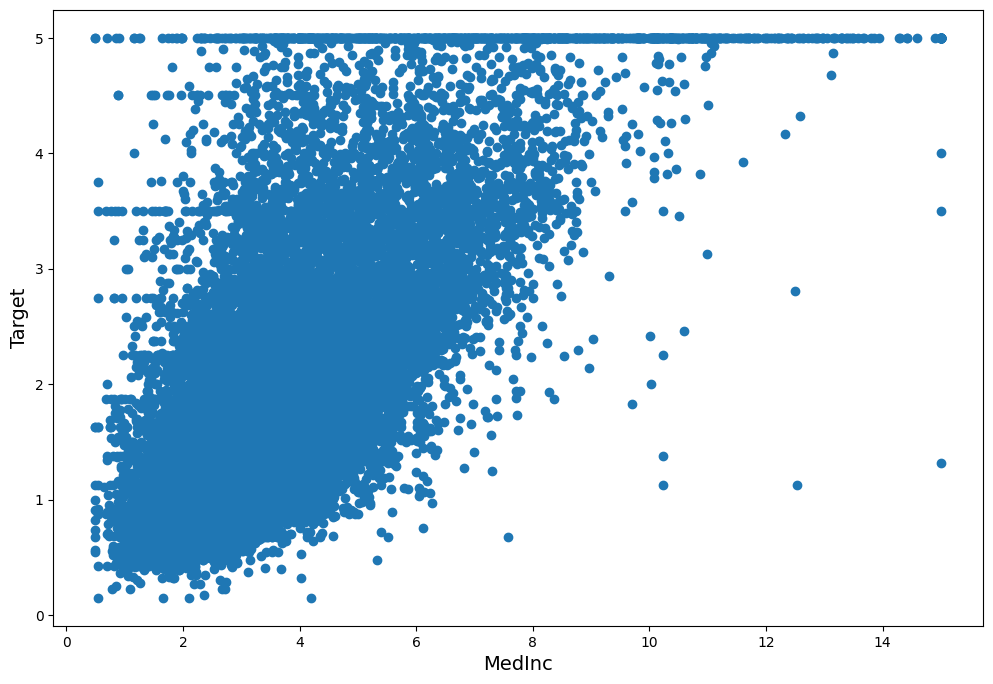

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(data = dataset, x = "MedInc", y = "Target")
plt.xlabel("MedInc")
plt.ylabel("Target")

### Splitting Dataset

In this section 76.5%  of the dataset is splitted as a training to train the  models and  learn patterns and relationships within the data.

 After training the model on the training set, the remaining 8.5% are used as validation set to fine-tune and optimize the model's hyperparameters. This helps prevent overfitting (model fitting the training data too closely and not generalizing well to new data) or underfitting (model not capturing the underlying patterns in the data).

 Once the best-performing model is selected using the validation set, then evaluate its performance on the test set. The test set is unseen data that the model has not encountered during training or validation. It provides an unbiased assessment of how well the model generalizes to new, unseen data.

In [59]:
# Split the dataset into training and testing sets
dataset = fetch_california_housing()
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size=0.15, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)


### Feature Standardization

Machine learning algorithms don’t perform well when the input numerical attributes have very different scales.
For instance, the population number ranges from about 3 to 35,682, while the median incomes only range from 0 to 15.
Without any scaling, most models will be biased toward ignoring the median
income and focusing more on the population.

In [58]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_trainStd = Scaler.fit_transform(X_train)
X_validStd = Scaler.transform(X_valid)
X_testStd = Scaler.transform(X_test)

In [15]:
X_trainStd

array([[ 0.03049382,  0.50808558, -0.20909376, ...,  0.02616137,
        -0.87443286,  0.84071097],
       [ 0.1307857 ,  0.50808558, -0.20149169, ...,  0.03417868,
        -0.86506903,  0.79578041],
       [ 0.44964616, -0.92109747,  0.39844364, ..., -0.05039726,
         1.32138392, -1.55059335],
       ...,
       [-0.2458378 ,  0.11109029, -0.61179253, ..., -0.06063878,
        -0.76674888,  0.5711276 ],
       [-1.27647437,  0.26988841, -0.30299101, ..., -0.09542782,
         0.6190971 , -0.24760707],
       [ 1.95397141,  0.74628276,  0.09440402, ..., -0.03754846,
        -0.6590649 ,  0.65599644]])

In [16]:
Y_test[:7]


array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ])

### Target value transformation

Since he target distribution has a heavy tail, we have to replace the target with its logarithm.

In [60]:
target_std = StandardScaler()

# Fit and transform the training target variable
Y_trainStd = target_std.fit_transform(Y_train.reshape(-1, 1))

# Transform the validation and test target variables

Y_validStd = target_std.transform(Y_valid.reshape(-1, 1))
Y_testStd = target_std.transform(Y_test.reshape(-1, 1))



In [13]:
Y_test.shape

(3096,)

## Modeling and Selection

### Linear Regression Model

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
LR=LinearRegression()
train=LR.fit(X_trainStd, Y_trainStd)

Mean Squared Error: 4.66
R-squared (R2) Score: 0.61


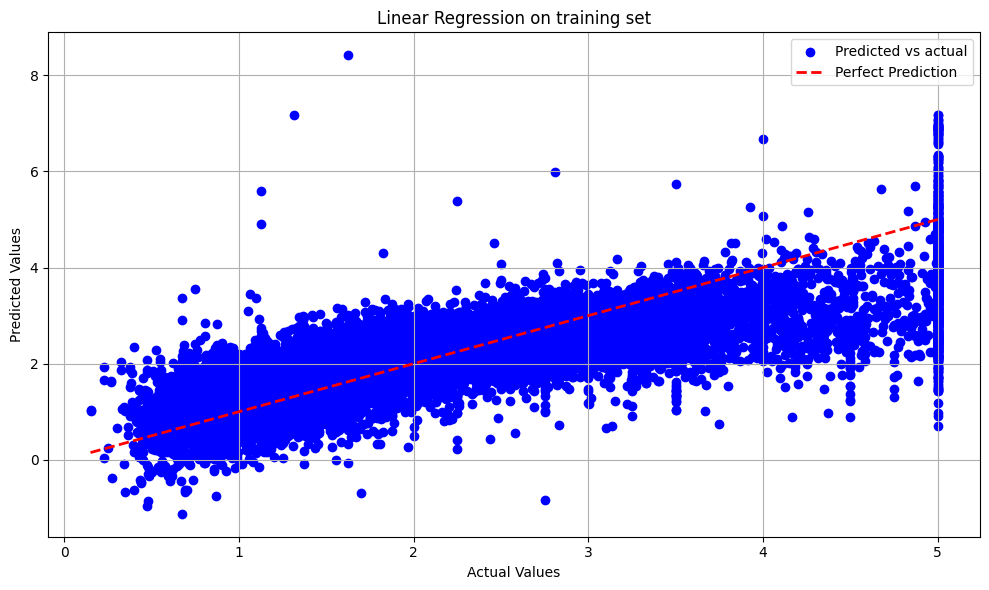

In [63]:
# Predicting model performance on training set
scaled_predictions = LR.predict(X_trainStd)
Y_pred = target_std.inverse_transform(scaled_predictions)
Y_pred[:7].flatten().round(2)

mse = mean_squared_error(Y_trainStd, Y_pred)
r2 = r2_score(Y_train, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred, color='b', label='Predicted vs actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression on training set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Mean Squared Error: 4.59
R-squared (R2) Score: 0.62


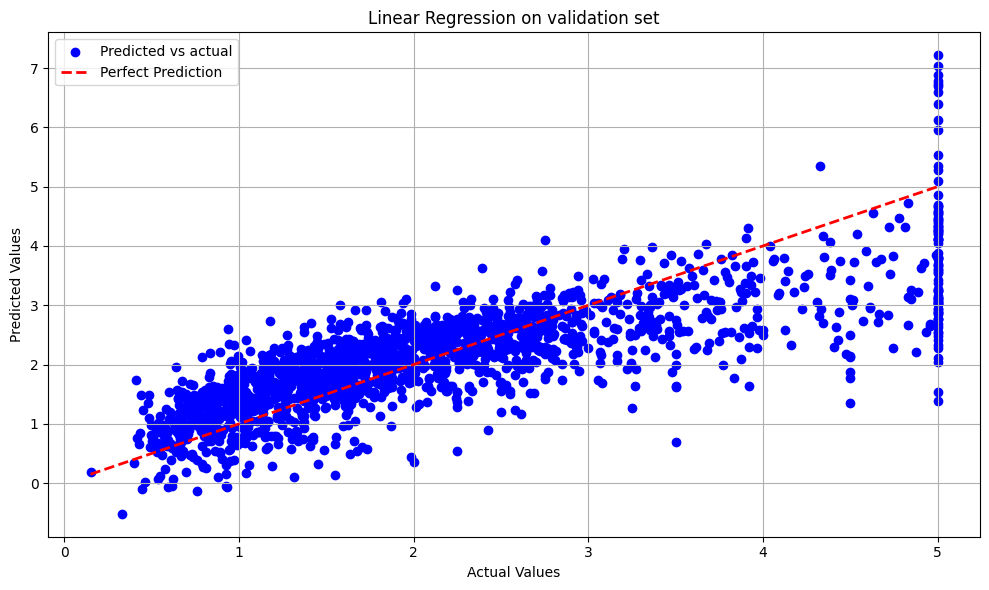

In [66]:
#Predict the model performance on the validation set
scaled_predictions = LR.predict(X_validStd)
#scaled_predictions[:5] # -2 = rounded to the nearest hundred
Y_pred = target_std.inverse_transform(scaled_predictions)
Y_pred[:7].flatten().round(2)

mse = mean_squared_error(Y_validStd, Y_pred)
r2 = r2_score(Y_valid, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(Y_valid, Y_pred, color='b', label='Predicted vs actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression on validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
Y_train[:7]

array([1.896, 1.797, 2.029, 0.858, 4.513, 0.67 , 1.172])

This is an example of a model underfitting. Which means that the model is not powerful enough to learn the patterns in the feature variables.

## K-Nearest Neighbors (KNN) Model

In [67]:
#Modeling and training the model with KNN
from sklearn.neighbors import KNeighborsRegressor
k=5
KNN = KNeighborsRegressor(n_neighbors=k)
train=KNN.fit(X_trainStd, Y_trainStd)

Mean Squared Error: 4.41
R-squared (R2) Score: 0.79


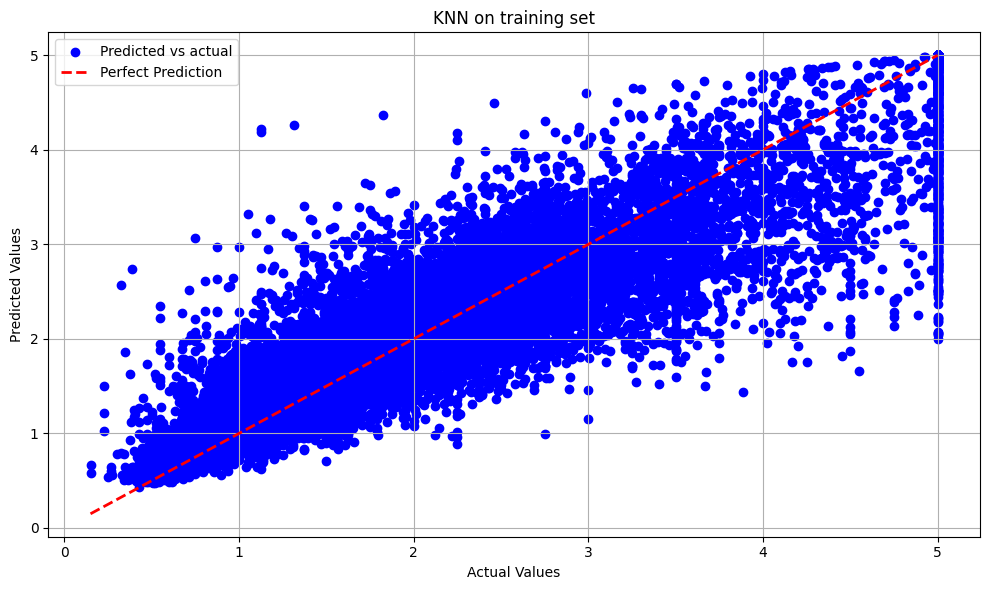

In [68]:
#Model prediction over the training set
scaled_predictions = KNN.predict(X_trainStd)
Y_pred = target_std.inverse_transform(scaled_predictions)
Y_pred[:7].flatten().round(2)


mse = mean_squared_error(Y_trainStd, Y_pred)
r2 = r2_score(Y_train, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred, color='b', label='Predicted vs actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('KNN on training set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Mean Squared Error: 4.46
R-squared (R2) Score: 0.70


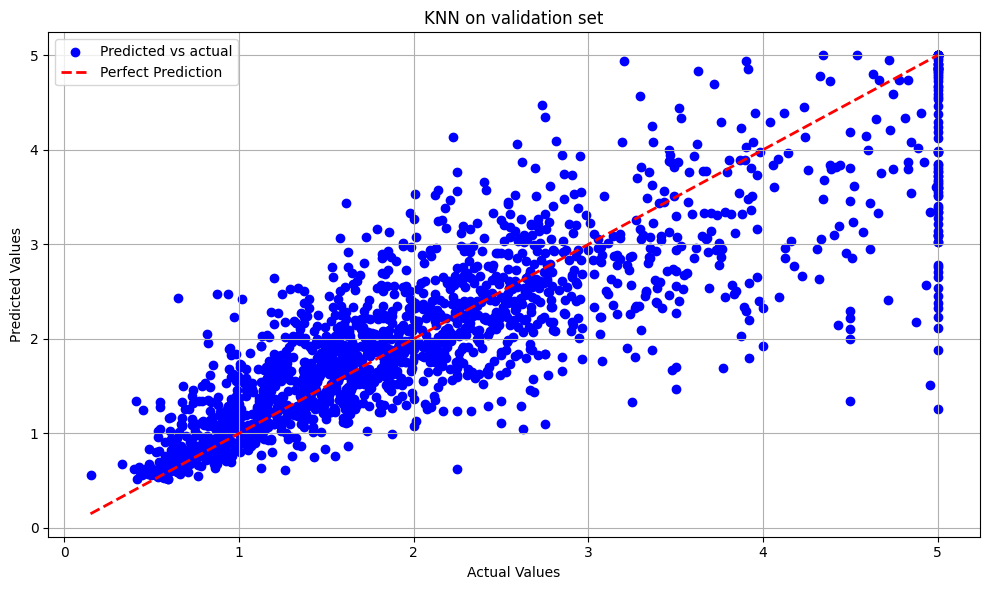

In [69]:
#Evaluating the model performance over the validation set

scaled_predictions = KNN.predict(X_validStd)
Y_pred = target_std.inverse_transform(scaled_predictions)
Y_pred[:7].flatten().round(2)

mse = mean_squared_error(Y_valid, Y_pred)
r2 = r2_score(Y_valid, Y_pred)

mse = mean_squared_error(Y_validStd, Y_pred)
r2 = r2_score(Y_valid, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(Y_valid, Y_pred, color='b', label='Predicted vs actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('KNN on validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Random Forest

In [70]:
#Modeling and training on Random Forest algorithm
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 500, max_depth = 20)
Y_trainStd = Y_trainStd.ravel()
train=RF.fit(X_trainStd, Y_trainStd)

Mean Squared Error: 4.30
R-squared (R2) Score: 0.97


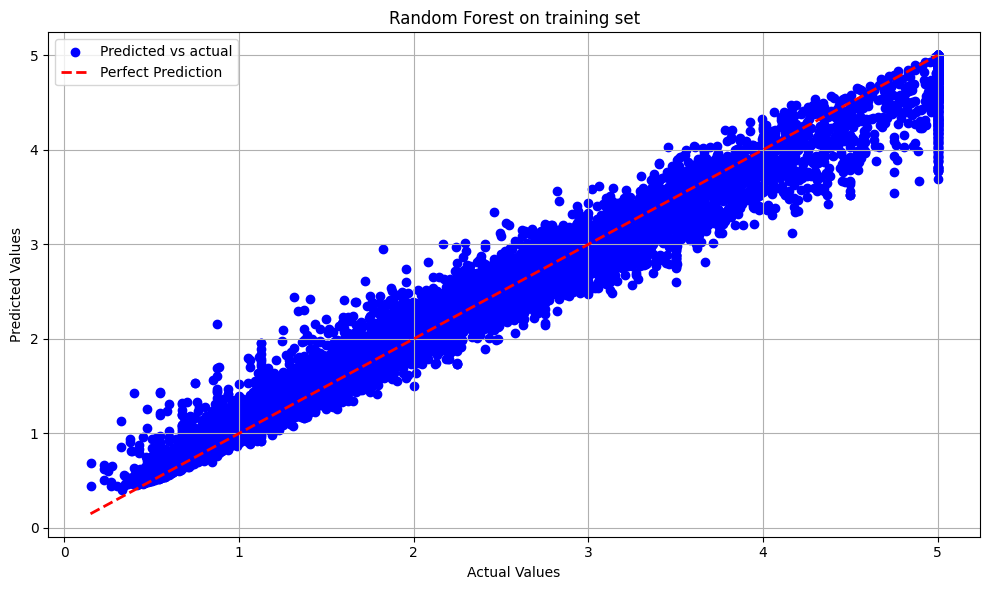

In [71]:
#Model prediction over the training set
scaled_predictions = RF.predict(X_trainStd)
scaled_predictions = scaled_predictions.reshape(-1, 1)
Y_pred = target_std.inverse_transform(scaled_predictions)

mse = mean_squared_error(Y_trainStd, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(Y_train, Y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred, color='b', label='Predicted vs actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Random Forest on training set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

[1.65 1.28 2.44 3.02 1.22 2.33 1.36]
[1.554 0.933 2.291 ... 2.296 2.12  0.67 ]
Mean Squared Error: 4.49
R-squared (R2) Score: 0.81


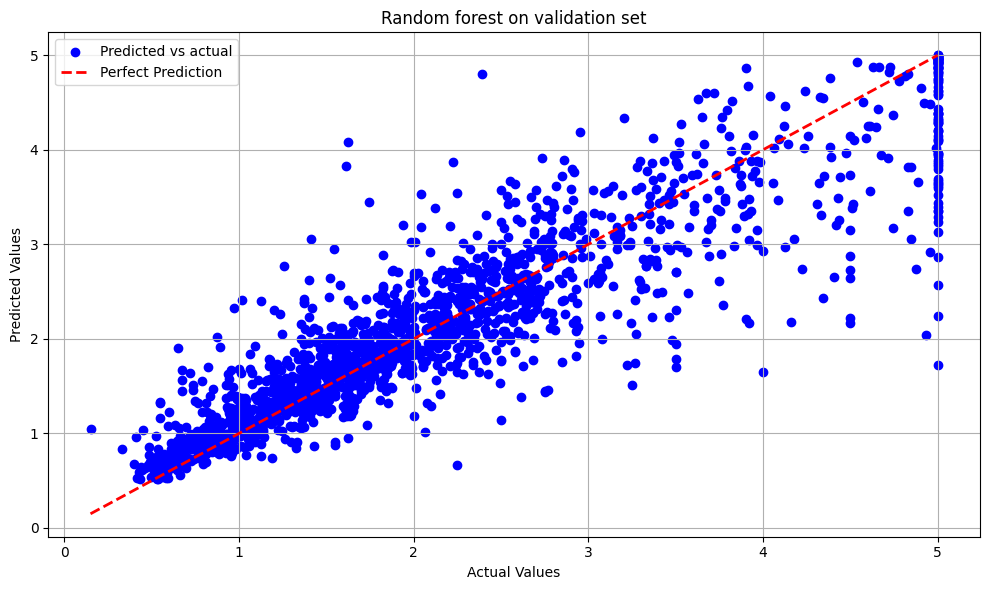

In [72]:
#Model prediction over the validation set
scaled_predictions = RF.predict(X_validStd)
scaled_predictions = scaled_predictions.reshape(-1, 1)
Y_pred = target_std.inverse_transform(scaled_predictions)

print(Y_pred[:7].flatten().round(2))
print(Y_valid)

mse = mean_squared_error(Y_validStd, Y_pred)
r2 = r2_score(Y_valid, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(Y_valid, Y_pred, color='b', label='Predicted vs actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Random forest on validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The Random Forest model demonstrates relatively consistent and robust performance on both the training and validation sets. The mean squared error is relatively low, and the R-squared scores indicate that the model explains a significant portion of the variance in the target variable.

##Decision Tree model

In [73]:
#Modeling and training the housing dataset with decision tree
from sklearn.tree import DecisionTreeRegressor
CART=DecisionTreeRegressor()
train=CART.fit(X_trainStd, Y_trainStd)

[1.9  1.8  2.03 0.86 4.51 0.67 1.17]
[1.896 1.797 2.029 ... 3.24  0.652 2.637]
Mean Squared Error: 0.00
R-squared (R2) Score: 1.00


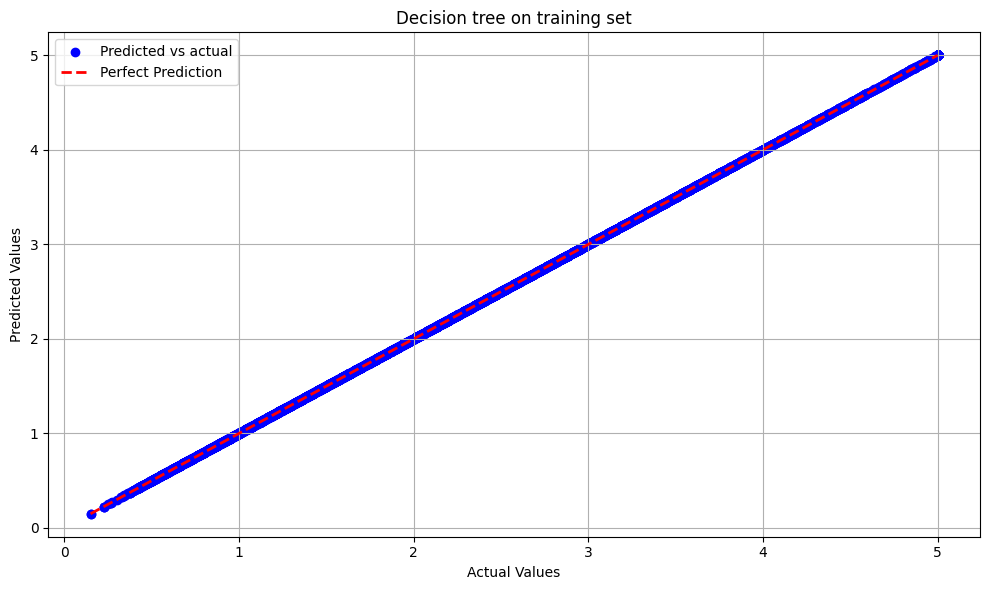

In [74]:
#Predicting the model over the training set
scaled_predictions = CART.predict(X_trainStd)
scaled_predictions = scaled_predictions.reshape(-1, 1)
Y_pred = target_std.inverse_transform(scaled_predictions)
print(Y_pred[:7].flatten().round(2))
print(Y_train)

mse = mean_squared_error(Y_train, Y_pred)
r2 = r2_score(Y_train, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred, color='b', label='Predicted vs actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Decision tree on training set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The decision tree model is showing no error at all on the training set, it could indeed be a sign of overfitting, where the model has learned the training data too well but fails to generalize to new, unseen data. To address this issue, you might want to consider simplifying the model by adjusting its hyperparameters.

### Feature selection

As I mentioned earlier, median income have high correlation with the median house value. the graph below shows the influnce of median income on predicting the price of housing in California. Hence, we can remove the other features as they don't have that much effective.

[1.6  1.09 3.22 3.56 1.15 2.42 1.17]
[1.554 0.933 2.291 ... 2.296 2.12  0.67 ]
Mean Squared Error: 0.53
R-squared (R2) Score: 0.61


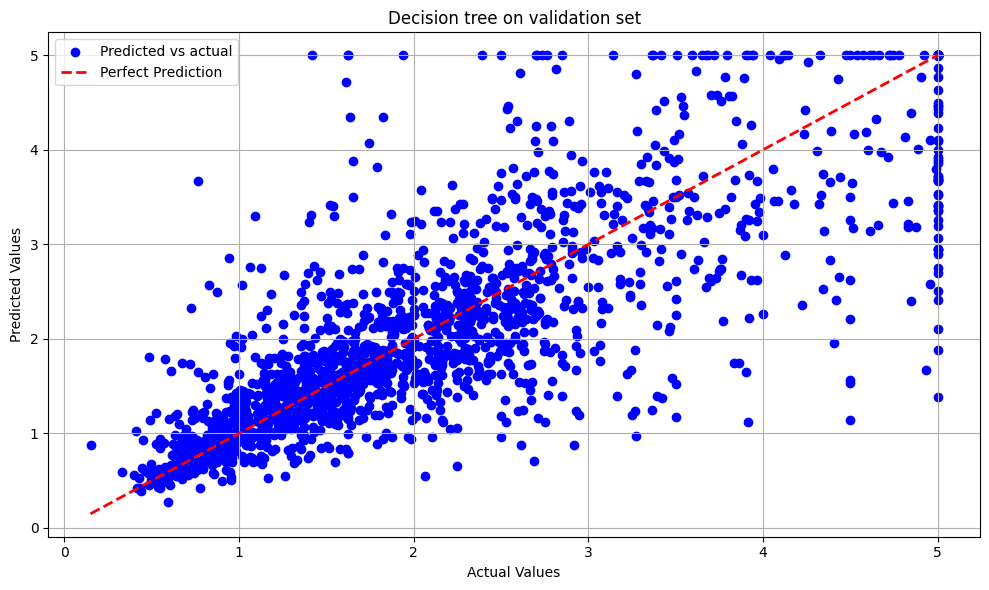

In [75]:
#Predicting the model over the validation set
scaled_predictions = CART.predict(X_validStd)
scaled_predictions = scaled_predictions.reshape(-1, 1)
Y_pred = target_std.inverse_transform(scaled_predictions)
print(Y_pred[:7].flatten().round(2))
print(Y_valid)


mse = mean_squared_error(Y_valid, Y_pred)
r2 = r2_score(Y_valid, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(Y_valid, Y_pred, color='b', label='Predicted vs actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Decision tree on validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

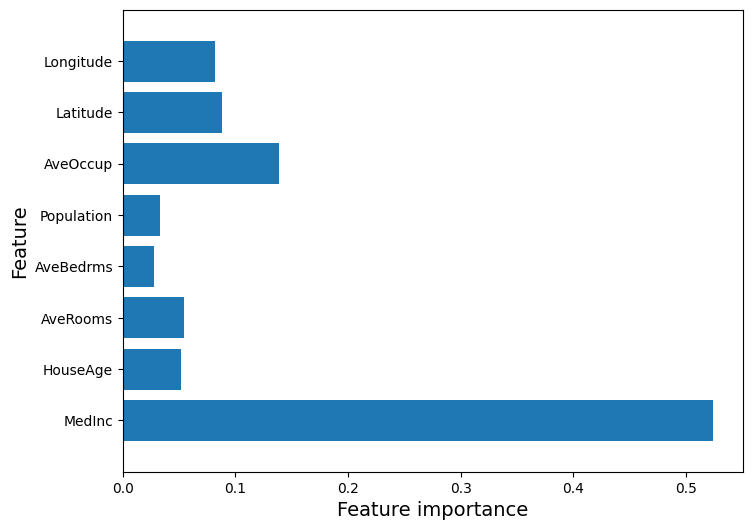

In [ ]:
def plot_feature_importances_housing(CART):
    plt.figure(figsize=(8,6))
    n_features = 8  # You need to specify the number of features
    plt.barh(range(n_features), CART.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset.feature_names[:n_features])  # Use the first 8 labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.savefig('feature_importance.png')

# Assuming 'dataset' and 'model' are defined elsewhere in your code.
plot_feature_importances_housing(CART)



In general, decision tree model demonstrates a clear case of overfitting. While it achieves perfect performance on the training set, it fails to generalize to new data, as evident from higher error metrics on the validation set.

## Deep Learning with Keras

In [42]:
tf.random.set_seed(42)
DL = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=X_trainStd.shape[1:]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)
])

In [54]:
DL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________


In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

DL.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])

In [44]:
history = DL.fit(X_trainStd, Y_train, epochs=500, validation_data=(X_validStd, Y_valid))

Epoch 1/500
494/494 [==============================] - 5s 9ms/step - loss: 0.9323 - root_mean_squared_error: 0.9656 - mean_absolute_percentage_error: 35.7596 - val_loss: 0.4574 - val_root_mean_squared_error: 0.6763 - val_mean_absolute_percentage_error: 25.5589
Epoch 2/500
494/494 [==============================] - 4s 7ms/step - loss: 0.4088 - root_mean_squared_error: 0.6393 - mean_absolute_percentage_error: 26.0021 - val_loss: 0.3764 - val_root_mean_squared_error: 0.6135 - val_mean_absolute_percentage_error: 24.3495
Epoch 3/500
494/494 [==============================] - 2s 3ms/step - loss: 0.3719 - root_mean_squared_error: 0.6098 - mean_absolute_percentage_error: 24.6401 - val_loss: 0.3559 - val_root_mean_squared_error: 0.5966 - val_mean_absolute_percentage_error: 22.7618
Epoch 4/500
494/494 [==============================] - 1s 2ms/step - loss: 0.3669 - root_mean_squared_error: 0.6057 - mean_absolute_percentage_error: 24.0475 - val_loss: 0.3417 - val_root_mean_squared_error: 0.5846 - 

In [45]:
DL.evaluate(X_validStd, Y_valid)

55/55 [==============================] - 0s 2ms/step - loss: 0.2873 - root_mean_squared_error: 0.5360 - mean_absolute_percentage_error: 19.3167


[0.28729692101478577, 0.5360008478164673, 19.316722869873047]

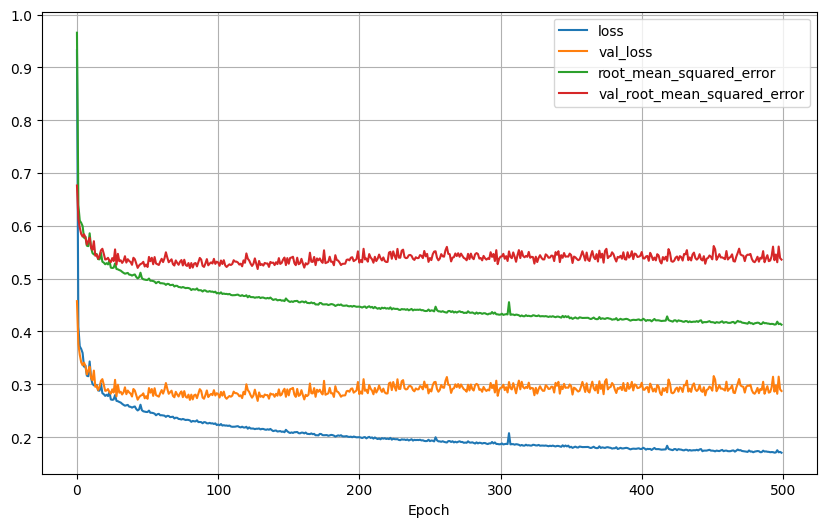

In [51]:
pd.DataFrame(history.history)[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,6))
plt.xlabel("Epoch")
plt.grid(True)
plt.show()

As we can see, there is a decrease in mean squared error or loss as the number of epochs increases during the training. This is indeed an indication that the model is learning and improving its performance on the training data.

## Evaluate the Model

In [53]:
mse_test = DL.evaluate(X_testStd, Y_test)

97/97 [==============================] - 0s 3ms/step - loss: 0.2725 - root_mean_squared_error: 0.5220 - mean_absolute_percentage_error: 20.4370


Deep learning model is chosen for testing the system model due to it's promising performance, as evidenced by low loss and RMSE values on both validation and training set.

The fact that the model's performance remains strong on the test set indicates that it is not overfitting and is capable of making accurate predictions on new data.

These results suggest that the selected model is suitable for the task at hand and can be considered for deployment or further optimization. It's important to note the balance between training and test set performance, as overly complex models may perform well on the training set but fail to generalize to new data. In this case, the model appears to strike a good balance.